<a href="https://colab.research.google.com/github/manvikhanna654/task_4_LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving data.csv to data (1).csv

📊 Available columns:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

📈 Model Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                          

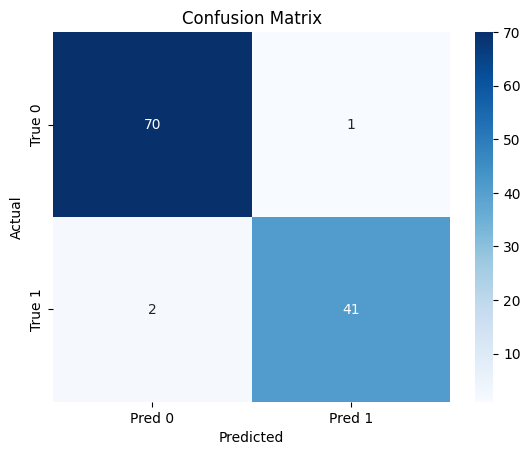

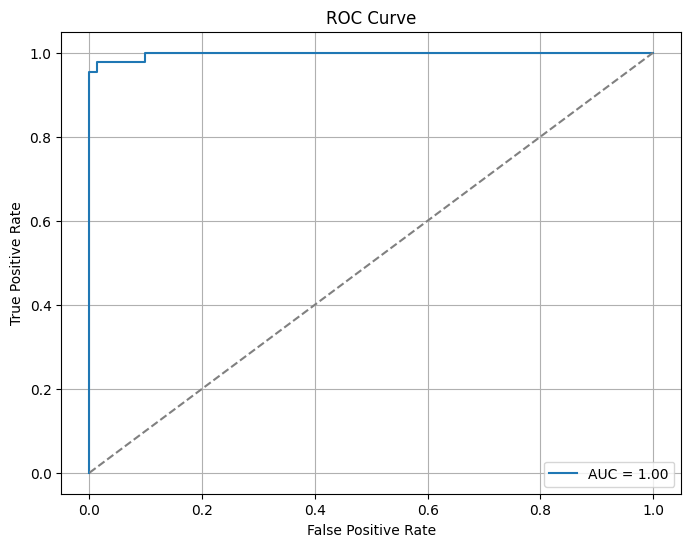


📊 Metrics with Threshold = 0.6
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233


In [2]:
# ✅ Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()

# ✅ Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score

# ✅ Step 3: Load and clean dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

print("\n📊 Available columns:")
print(df.columns.tolist())

# ✅ Drop unwanted columns (like IDs and unnamed)
df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'Unnamed' in col])

# ✅ Handle target column
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant:1, Benign:0
    target_col = 'diagnosis'
else:
    raise ValueError("Target column 'diagnosis' not found.")

# ✅ Drop or impute missing values
df = df.dropna()  # OR you can use df.fillna(df.mean()) to impute

# ✅ Step 4: Prepare X and y
X = df.drop(columns=[target_col])
y = df[target_col]

# ✅ Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 7: Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# ✅ Step 8: Evaluate model
print("\n📈 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Optional: Threshold Tuning
threshold = 0.6
y_pred_thresh = (y_prob >= threshold).astype(int)
print(f"\n📊 Metrics with Threshold = {threshold}")
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
